In [1]:
%pip install numpy
%pip install matplotlib
%pip install pandas 
%pip install seaborn
%pip install kagglehub
%pip install tensorflow
%pip install tensorflow-datasets
%pip install jinja2
%pip install opencv-python



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as mplt
import pandas as pd
import seaborn as sns
import kagglehub
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2



c:\Users\sasup\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
datos, metadatos = tfds.load('Oxford_iiit_pet',as_supervised = True, with_info =True)

## EDA  ~ Dataset Exploration

### Structure

In [4]:
metadatos

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/4.0.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed and
    species. Additionally, head bounding boxes are provided for the training split,
    allowing using this dataset for simple object detection tasks. In the test
    split, the bounding boxes are empty.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir='C:\\Users\\sasup\\tensorflow_datasets\\oxford_iiit_pet\\4.0.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=773.68 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'head_bbox': BBoxFeature(shape=(4,), dtype=float32),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'la

In [5]:
metadatos.features


FeaturesDict({
    'file_name': Text(shape=(), dtype=string),
    'head_bbox': BBoxFeature(shape=(4,), dtype=float32),
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
    'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [6]:
metadatos.splits


{'train': <SplitInfo num_examples=3680, num_shards=4>,
 'test': <SplitInfo num_examples=3669, num_shards=4>}

In [7]:
num_clases = metadatos.features['label'].num_classes
print(num_clases)


37


image  label
0  [[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...     33
1  [[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...     12
2  [[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...      9
3  [[[108, 130, 117], [114, 133, 127], [108, 128,...     32
4  [[[237, 228, 91], [236, 228, 93], [230, 225, 8...     33
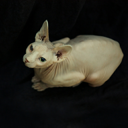
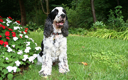
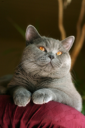
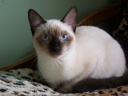
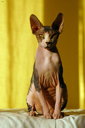

In [8]:
tfds.as_dataframe(datos['train'].take(5),metadatos)


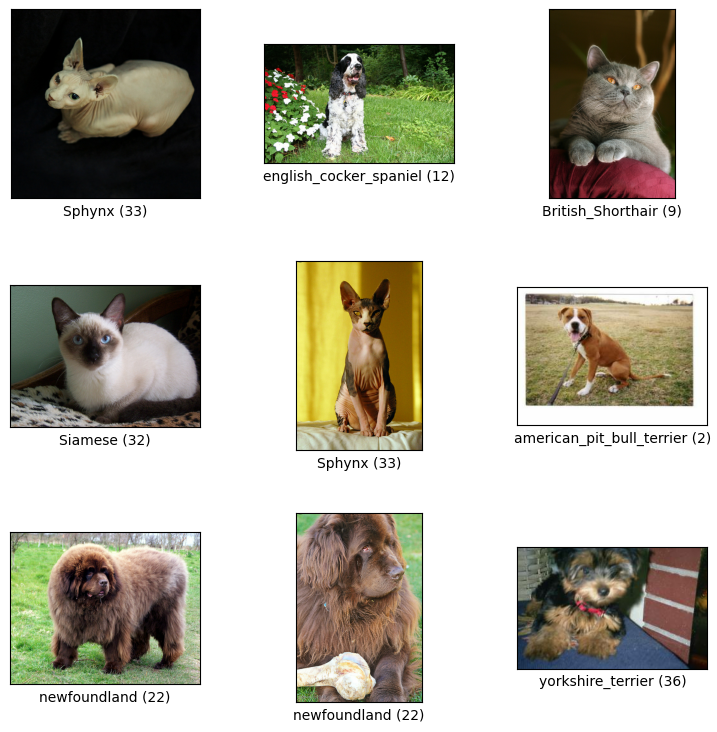

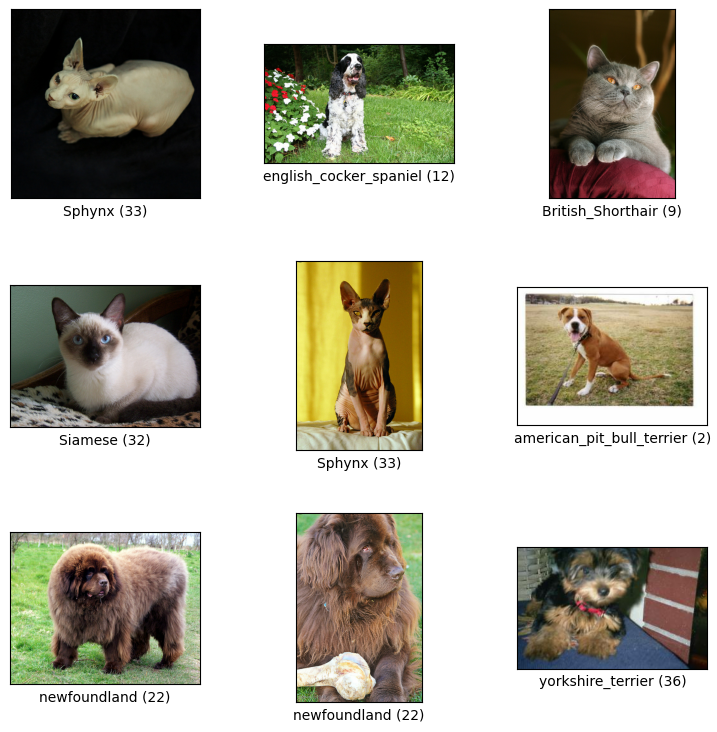

In [9]:
tfds.show_examples(
    datos['train'],
    metadatos,
    image_key='image',
    label_key='label'
)


In [10]:
t = 150

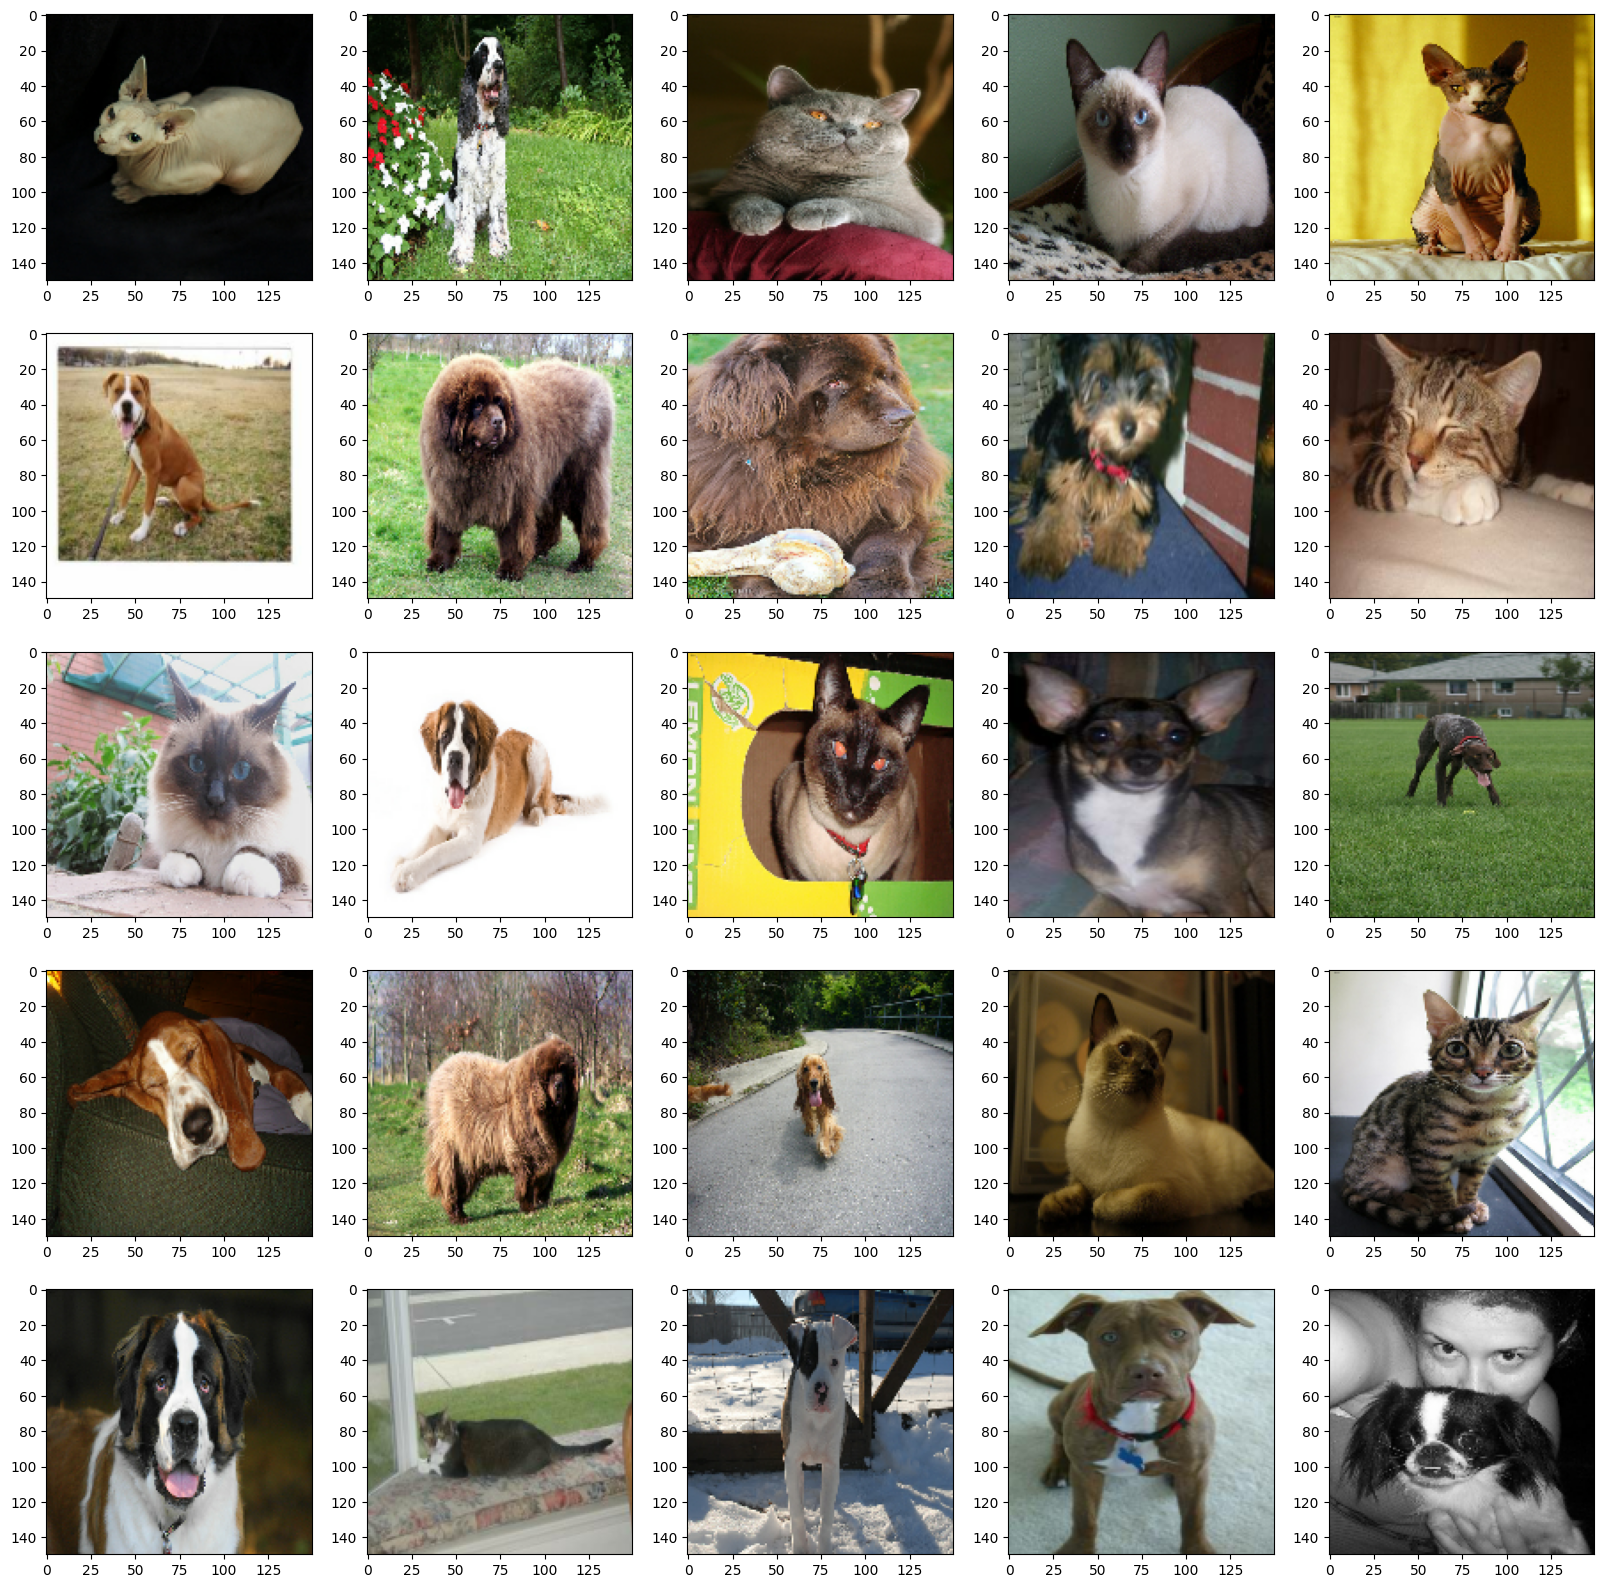

In [11]:
mplt.figure(figsize=(20,20))
for i,(imagen, etiqueta) in enumerate(datos['train'].take(25)):
    imagen = cv2.resize(imagen.numpy(),(t,t))
    mplt.subplot(5,5,i+1)
    mplt.imshow(imagen)

## Reordenar Dataset

### Combinar train y test que vienen por defecto (50-50)

In [12]:
dTrain = datos['train']
dTest = datos['test']

data = dTrain.concatenate(dTest)

total = metadatos.splits['train'].num_examples + metadatos.splits['test'].num_examples 
print("Ttotal de datos :",total )

Ttotal de datos : 7349


### Mezclar para evitar clases juntas

In [13]:
data = data.shuffle(buffer_size= total ,seed = 42)


### Divir Dataset

Se divide en:
- 70% Entrenamiento
- 15% Testeo 
- 15% Validacion


In [14]:
entrenamiento_ds = data.take(int(0.7*total))
test_ds = data.skip(int(0.7*total)).take(int(0.15*total))
validacion_ds = data.skip(int(0.85*total)).take(int(0.15*total))

### Visualizar distribucion por clases

Dado que se quiere usar sns primero se pasarn las etiquetas en su valor numerico para poder transformar en un dataframe de pandas, para poder tener una tabla con columna ´´label´´ y una fila por cada label

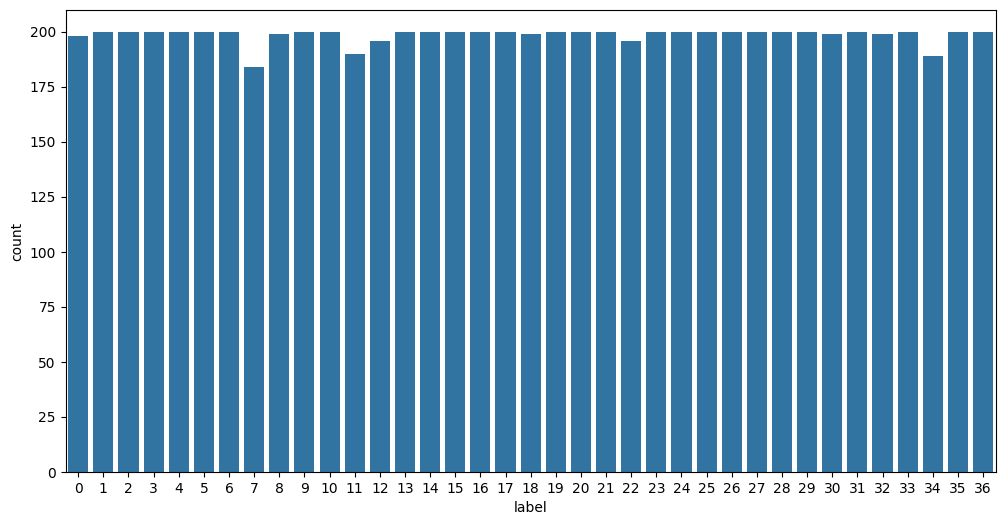

label
29    200
25    200
35    200
19    200
1     200
5     200
6     200
16    200
2     200
27    200
14    200
26    200
21    200
23    200
4     200
24    200
13    200
17    200
33    200
28    200
20    200
15    200
3     200
31    200
9     200
10    200
36    200
8     199
18    199
30    199
32    199
0     198
22    196
12    196
11    190
34    189
7     184
Name: count, dtype: int64

In [15]:
etiqueta = []

for img,label in data:
    etiqueta.append(label.numpy())


mplt.figure(figsize=(12, 6))

df = pd.DataFrame({'label': etiqueta})

sns.countplot(data=df, x='label')

mplt.show()

df['label'].value_counts()



### Transformacion del dataset

- Normalizar los pixeles entre 0,1
- USar one_hote para dejar las etiquetas como vectores 
- Dejar cada imagen en tamaño cuadrado "t"
- Dejar la imagen en RGB (tamaño,tamaño,3)

In [16]:

def transformacionIMG(imagen,label):
    imagen = tf.image.resize(imagen, [t, t])
    #imagen = tf.reshape(imagen, [t, t, 3])
    imagen = imagen / 255.0
    label = tf.one_hot(label,num_clases)
    return imagen, label

entrenamiento_ds = entrenamiento_ds.map(transformacionIMG)
test_ds = test_ds.map(transformacionIMG)
validacion_ds = validacion_ds.map(transformacionIMG)



#### Aumento de Datos 

**Usando Arreglos de numpy**

In [17]:
x_train = np.concatenate([x for x, y in entrenamiento_ds], axis=0)
y_train = np.concatenate([y for x, y in entrenamiento_ds], axis=0)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=50,      # rotar la imagen hasta 20 grados
    width_shift_range=0.2,  # mover horizontalmente hasta 20%
    height_shift_range=0.1, # mover verticalmente hasta 20%
    zoom_range=0.2,         # hacer zoom aleatorio
    horizontal_flip=True,   # voltear horizontalmente
    fill_mode='nearest'     # cómo rellenar los píxeles nuevos
)

datasetslist = [entrenamiento_ds,test_ds,validacion_ds]
datagen.fit(x_train)

mplt.figure(figsize=(20,8))

for img,m in datagen.flow(x_train,y_train,batch_size=10,shuffle = False):
    for i in range(10):
        mplt.subplot(2,5,i+1)
        mplt.imshow(img[i].reshape(t,t,3))
    break





ValueError: Input to `.fit()` should have rank 4. Got array with shape: (771600, 150, 3)

**Usando tf.data.Datase**

In [19]:
def aumento(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image, label

entrenamiento_ds = entrenamiento_ds.map(aumento)




### Batch y prefetch

In [20]:
entrenamiento_ds = entrenamiento_ds.batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)
validacion_ds = validacion_ds.batch(32).prefetch(tf.data.AUTOTUNE)

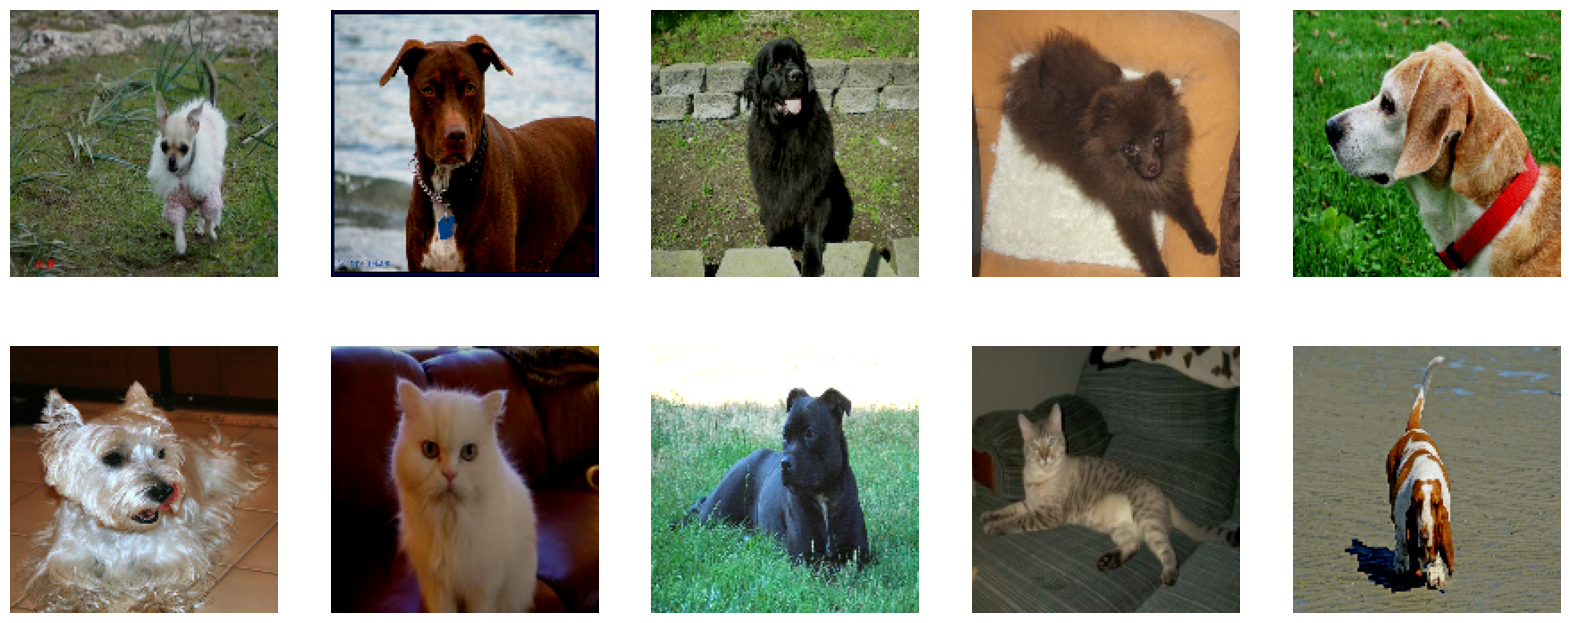

In [21]:
mplt.figure(figsize=(20,8))
for images, labels in entrenamiento_ds.take(1):  
    for i in range(10):
        mplt.subplot(2, 5, i+1)
        mplt.imshow(images[i])  
        mplt.axis('off')
    mplt.show()

## Baseline Model 

- Usando Flatten donde la forma del input dado que es RGB se sigue usando [t,t,3] donde t es el tamaño
- Dato que es un modelo base solo formara de 2 capas densas de 128 neuronas con activacion, relu, se usa por rapidez tanto en el gradiente como en compilacion
- la ultima capa sera con la misma cantidad de neuronas que clases y usara activacion con softmax dado que es multiclase
- Se usa Categorical_crossentropy dado que anteriormente se volvieron etiquetas One-Hot

In [22]:
base_Model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(t,t,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_clases, activation='softmax')
    ]
)

base_Model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

base_Model.summary()

c:\Users\sasup\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,661,413 (33.04 MB)

 Trainable params: 8,661,413 (33.04 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [23]:
history = base_Model.fit(entrenamiento_ds, epochs=100,validation_data=validacion_ds)

Epoch 1/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.0266 - loss: 5.2102 - val_accuracy: 0.0290 - val_loss: 3.6110
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.0278 - loss: 3.6482 - val_accuracy: 0.0200 - val_loss: 3.6128
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.0280 - loss: 3.6551 - val_accuracy: 0.0227 - val_loss: 3.6112
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.0259 - loss: 3.6333 - val_accuracy: 0.0309 - val_loss: 3.6073
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.0233 - loss: 3.6246 - val_accuracy: 0.0272 - val_loss: 3.6104
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.0260 - loss: 3.6202 - val_accuracy: 0.0254 - val_loss: 3.6103
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.0276 - loss: 3.6698 - val_accuracy: 0.0345 - val_loss: 3.5988
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.0239 - loss: 

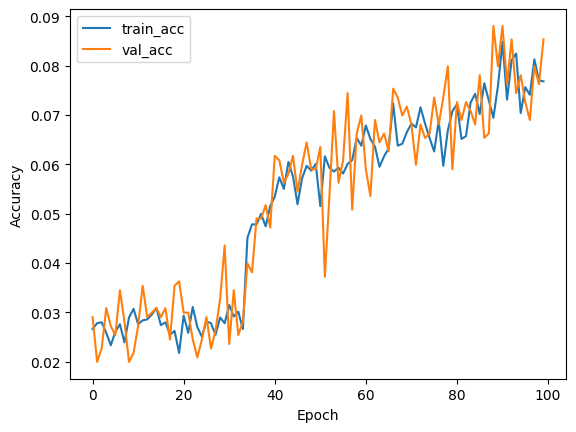

In [24]:
mplt.plot(history.history['accuracy'], label='train_acc')
mplt.plot(history.history['val_accuracy'], label='val_acc')
mplt.xlabel('Epoch')
mplt.ylabel('Accuracy')
mplt.legend()
mplt.show()


In [25]:
test_loss, test_acc = base_Model.evaluate(test_ds)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0917 - loss: 3.3139
Test loss: 3.3139283657073975
Test accuracy: 0.0916515439748764
